In [1]:
import warnings
from pathlib import Path

import pandas as pd

from plot_utils import plot_map_per_config

warnings.filterwarnings('ignore', category=UserWarning)

#### Create configs for loading evalzoo results

In [2]:
RESULTS_DIR = Path("../2.evalzoo/results/")
MERTRICS_FILENAME = "metrics_level_1_ref"
FIGSAVE_PATH = Path("output/mAP_visualizations")

METRICS_COLUMNS = {
    "sim_retrieval_average_precision_ref_i_mean_i": "mAP",
    "sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i": "-log(pvalue)",
    "sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i": "-log(qvalue)",
}

GROUPBY_COLUMNS = {
    "same_well_diff_pert": ["Metadata_Well"],
    "same_pert_diff_well": ["Metadata_JCP2022"],
    "same_well_same_pert": ["Metadata_Well", "Metadata_JCP2022"],
}

In [3]:
metrics = {
    # subset -> robustMAD -> feature select -> metrics
    "subset->preprocess\t\t\t": {
        "same_well_diff_pert": "0e4cd68f",
        "same_pert_diff_well": "ceb5f02a",
        "same_well_same_pert": "34fbd8a4",
    },
    # subset -> well correct -> robustMAD -> feature select -> metrics
    "subset->well_correct->preprocess\t": {
        "same_well_diff_pert": "82ad004e",
        "same_pert_diff_well": "f5c36cb4",
        "same_well_same_pert": "d66f1bce",
    },
    # well correct -> robustMAD -> feature select -> subset -> metrics
    "well_correct->subset->preprocess\t": {
        "same_well_diff_pert": "3ec971b2",
        "same_pert_diff_well": "72f94e10",
        "same_well_same_pert": "138739c0",
    },
    # subset -> robustMAD -> feature select -> cell count correct -> metrics
    "subset->preprocess->cc_correct\t": {
        "same_well_diff_pert": "3701ed2c",
        "same_pert_diff_well": "440d5bda",
        "same_well_same_pert": "a69994b0",
    },
    # subset -> cell count correct -> robustMAD -> feature select -> metrics
    "subset->cc_correct->preprocess\t": {
        "same_well_diff_pert": "d2311b58",
        "same_pert_diff_well": "5f53102a",
        "same_well_same_pert": "e2bf955d",
    },
    # subset -> cell count correct -> well correct -> robustMAD -> feature select -> metrics
    "subset->cc_correct->well_correct->preprocess\t": {
        "same_well_diff_pert": "304eb132",
        "same_pert_diff_well": "1b22d880",
        "same_well_same_pert": "faa6ba3e",
    },
}

#### Load evalzoo metrics

In [4]:
def load_metrics(metrics, metrics_columns, groupby_columns, results_dir, mertrics_filename):
    metrics_dfs = []

    for subset, configs in metrics.items():
        for config, config_dir in configs.items():
            metric_cols = list(metrics_columns.keys())
            metrics_path = results_dir / config_dir / f"{mertrics_filename}.parquet"
            metrics_df = pd.read_parquet(metrics_path, columns=metric_cols + groupby_columns[config])
            metrics_df = metrics_df.groupby(groupby_columns[config])[metric_cols].mean().reset_index()
            # metrics_df.drop(groupby_columns[config], axis=1, inplace=True)
            metrics_df.rename(columns=metrics_columns, inplace=True)
            metrics_df["config"] = config
            metrics_df["subset"] = subset
            metrics_df["p<0.05"] = metrics_df["-log(pvalue)"] > 1.3
            metrics_dfs.append(metrics_df)

    metrics_df = pd.concat(metrics_dfs, axis=0)
    return metrics_df

In [5]:
metrics_df = load_metrics(metrics, METRICS_COLUMNS, GROUPBY_COLUMNS, RESULTS_DIR, MERTRICS_FILENAME)
print(metrics_df.shape)

(24348, 8)


#### Plot mAP scatterplots and densities

same_well_diff_pert subset->preprocess			 mmAP: 0.0634 p<0.05: 0.139 (51/368)
same_well_diff_pert subset->well_correct->preprocess	 mmAP: 0.0594 p<0.05: 0.0353 (13/368)
same_well_diff_pert well_correct->subset->preprocess	 mmAP: 0.0978 p<0.05: 0.166 (61/368)
same_well_diff_pert subset->preprocess->cc_correct	 mmAP: 0.0564 p<0.05: 0.0489 (18/368)
same_well_diff_pert subset->cc_correct->preprocess	 mmAP: 0.053 p<0.05: 0.0 (0/368)
same_well_diff_pert subset->cc_correct->well_correct->preprocess	 mmAP: 0.248 p<0.05: 0.905 (333/368)


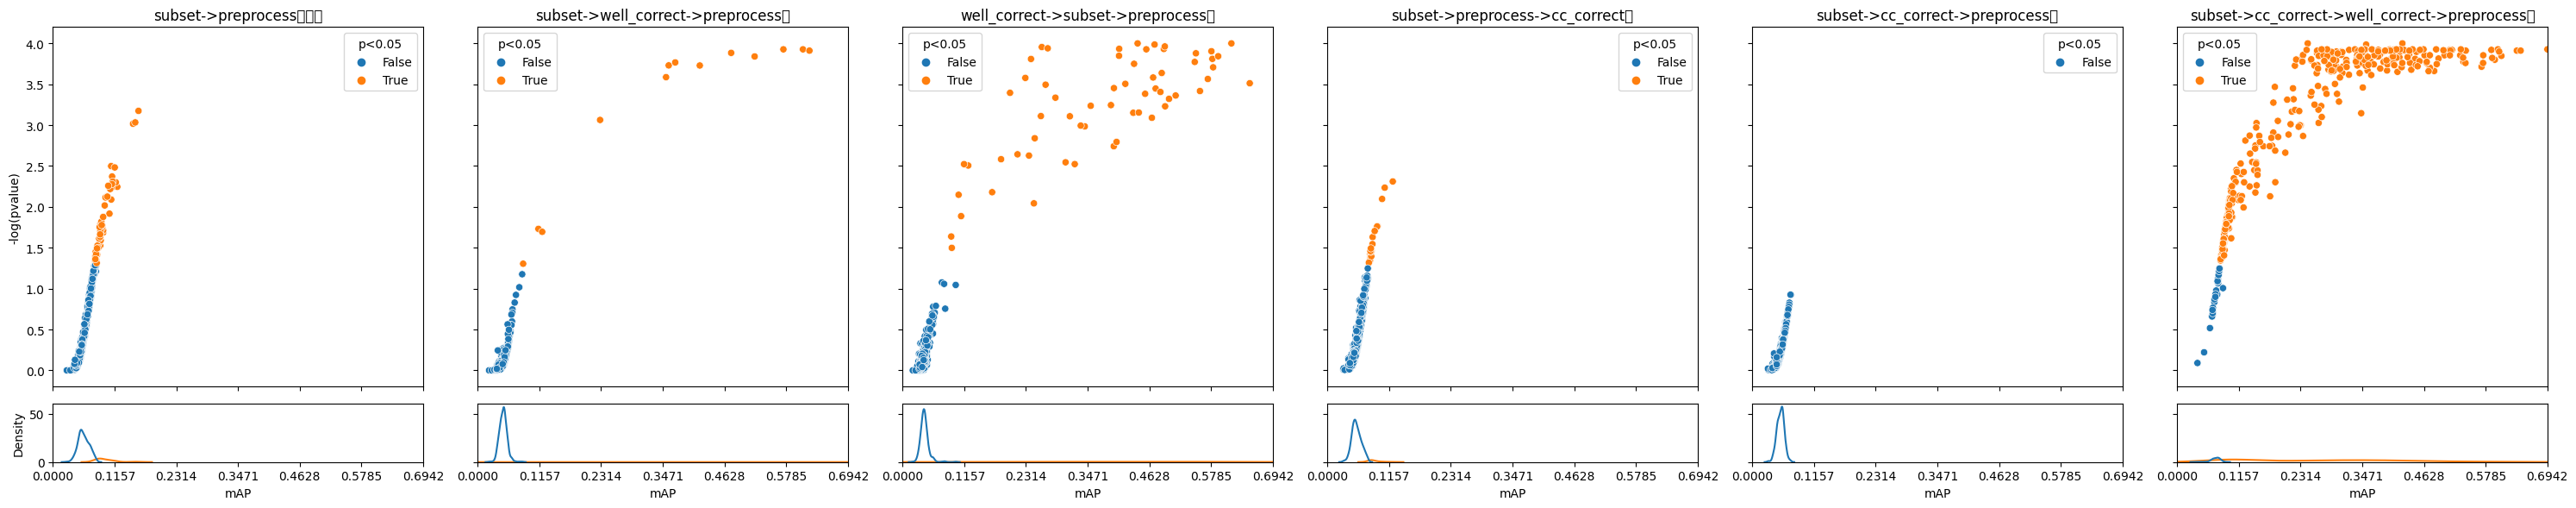

same_pert_diff_well subset->preprocess			 mmAP: 0.00961 p<0.05: 0.0 (0/37)
same_pert_diff_well subset->well_correct->preprocess	 mmAP: 0.0135 p<0.05: 0.0 (0/37)
same_pert_diff_well well_correct->subset->preprocess	 mmAP: 0.0102 p<0.05: 0.027 (1/37)
same_pert_diff_well subset->preprocess->cc_correct	 mmAP: 0.013 p<0.05: 0.027 (1/37)
same_pert_diff_well subset->cc_correct->preprocess	 mmAP: 0.0129 p<0.05: 0.0 (0/37)
same_pert_diff_well subset->cc_correct->well_correct->preprocess	 mmAP: 0.0107 p<0.05: 0.0 (0/37)


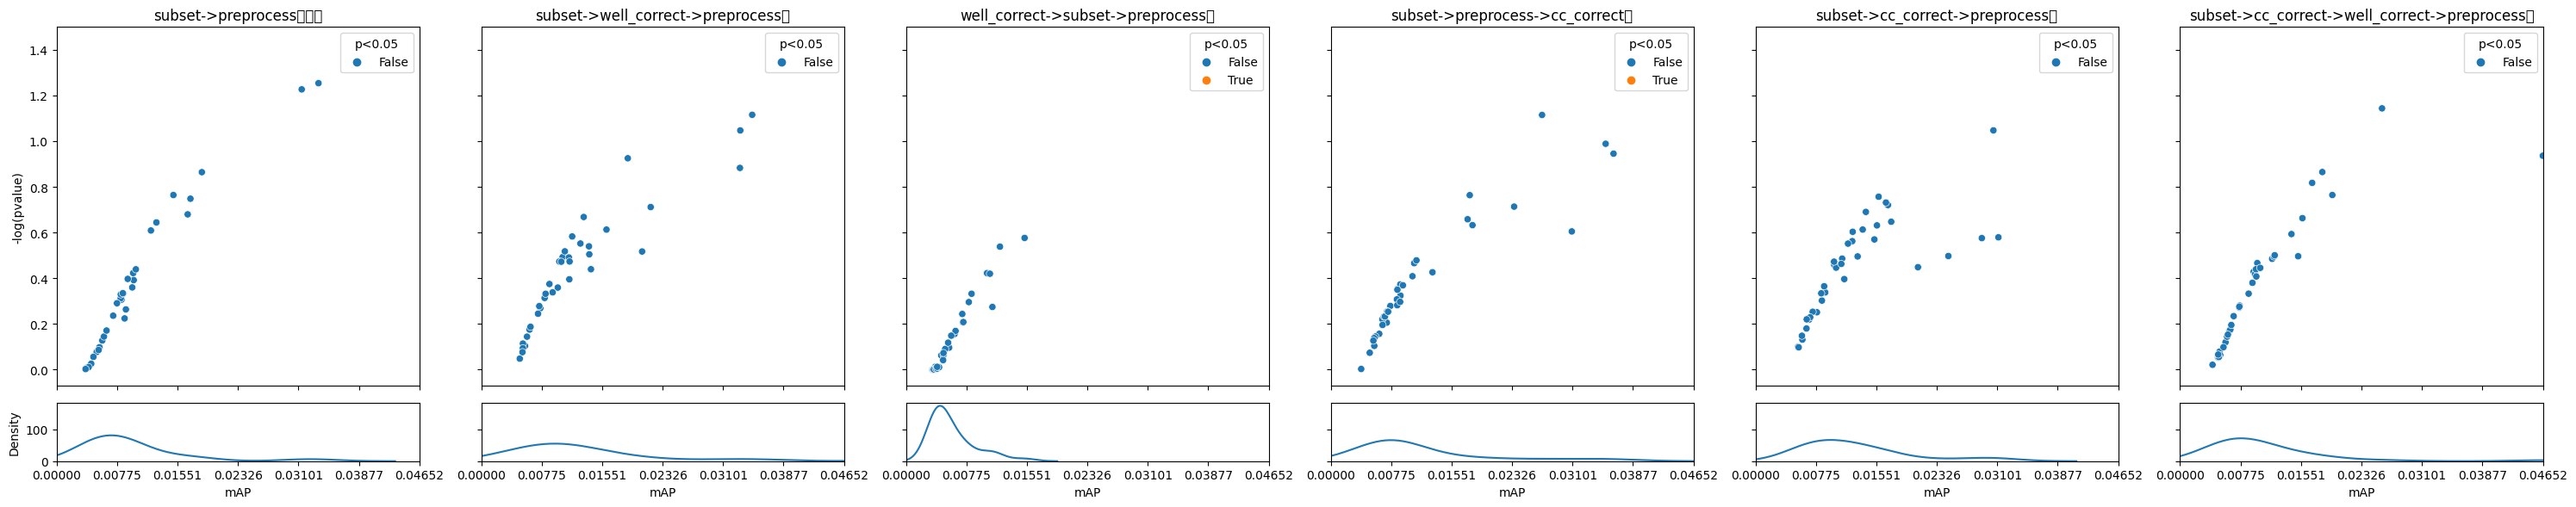

same_well_same_pert subset->preprocess			 mmAP: 0.197 p<0.05: 0.902 (3295/3653)
same_well_same_pert subset->well_correct->preprocess	 mmAP: 0.165 p<0.05: 0.775 (2831/3653)
same_well_same_pert well_correct->subset->preprocess	 mmAP: 0.243 p<0.05: 0.684 (2499/3653)
same_well_same_pert subset->preprocess->cc_correct	 mmAP: 0.0887 p<0.05: 0.499 (1822/3653)
same_well_same_pert subset->cc_correct->preprocess	 mmAP: 0.0325 p<0.05: 0.137 (502/3653)
same_well_same_pert subset->cc_correct->well_correct->preprocess	 mmAP: 0.515 p<0.05: 0.959 (3503/3653)


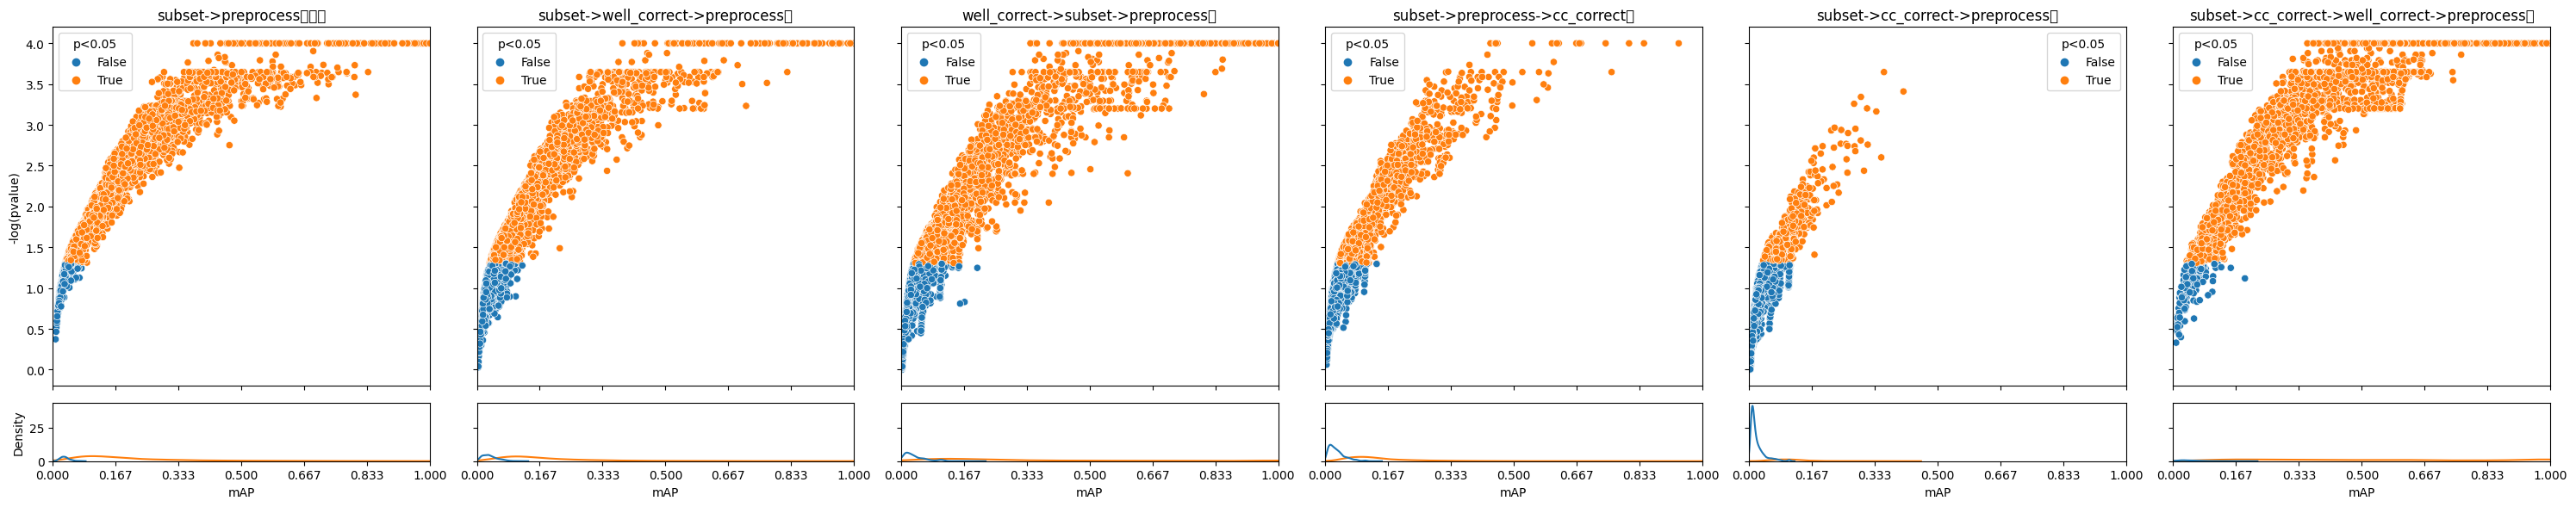

In [6]:
for config in metrics_df.config.unique():
    config_df = metrics_df[metrics_df.config==config]
    plot_map_per_config(config_df, config, figsave_path=FIGSAVE_PATH)

### Explore calculated metrics on low/high cell count variability ORFs

In [7]:
ann_df_trt_low_cvar = pd.read_parquet("../1.load/output/subset_profiles_low_cvar_metadata.parquet")
ann_df_trt_low_cvar

Metadata_JCP2022 Metadata_broad_sample         Metadata_Name  \
0       JCP2022_900006    ccsbBroad304_00008  ORF000425.1_TRC304.1   
1       JCP2022_900176    ccsbBroad304_00189  ORF011559.1_TRC304.1   
3       JCP2022_900294    ccsbBroad304_00321  ORF012872.1_TRC304.1   
4       JCP2022_900295    ccsbBroad304_00322  ORF012041.1_TRC304.1   
6       JCP2022_900392    ccsbBroad304_00423  ORF005089.1_TRC304.1   
...                ...                   ...                   ...   
19122   JCP2022_915014    ccsbBroad304_16053  ORF001543.1_TRC304.1   
19124   JCP2022_915024    ccsbBroad304_16064  ORF006054.1_TRC304.1   
19125   JCP2022_915028    ccsbBroad304_16068  ORF008706.1_TRC304.1   
19126   JCP2022_915030    ccsbBroad304_16070  ORF000807.1_TRC304.1   
19127   JCP2022_915053    ccsbBroad304_16093  ORF016633.1_TRC304.1   

      Metadata_Vector Metadata_Transcript Metadata_Symbol  \
0             pLX_304         NM_001095.4           ASIC1   
1             pLX_304         NM_000587.4              C7   
3             pLX_304         NM_001830.4           CLCN4   
4             pLX_304         NM_000084.5           CLCN5   
6             pLX_304         NM_001350.5            DAXX   
...               ...                 ...             ...   
19122         pLX_304         NM_033364.4          MAATS1   
19124         pLX_304      NM_001077594.1         EXOC3L4   
19125         pLX_304      NM_001286829.2           NAPRT   
19126         pLX_304         NM_144577.4         CCDC114   
19127         pLX_304         NM_139244.4          STXBP5   

      Metadata_NCBI_Gene_ID Metadata_Taxon_ID  \
0                        41              9606   
1                       730              9606   
3                      1183              9606   
4                      1184              9606   
6                      1616              9606   
...                     ...               ...   
19122                 89876              9606   
19124                 91828              9606   
19125                 93100              9606   
19126                 93233              9606   
19127                134957              9606   

                     Metadata_Gene_Description  Metadata_Prot_Match  \
0           acid sensing ion channel subunit 1                100.0   
1                                complement C7                100.0   
3             chloride voltage-gated channel 4                100.0   
4             chloride voltage-gated channel 5                100.0   
6              death domain associated protein                100.0   
...                                        ...                  ...   
19122  MYCBP associated and testis expressed 1                 99.8   
19124       exocyst complex component 3 like 4                 99.7   
19125     nicotinate phosphoribosyltransferase                 86.0   
19126        coiled-coil domain containing 114                 69.1   
19127               syntaxin binding protein 5                 99.9   

       Metadata_Insert_Length Metadata_pert_type Metadata_Source  \
0                      1584.0                trt        source_4   
1                      2529.0                trt        source_4   
3                      2280.0                trt        source_4   
4                      2238.0                trt        source_4   
6                      2220.0                trt        source_4   
...                       ...                ...             ...   
19122                  2301.0                trt        source_4   
19124                  2166.0                trt        source_4   
19125                  1398.0                trt        source_4   
19126                  1389.0                trt        source_4   
19127                  3345.0                trt        source_4   

      Metadata_Plate Metadata_Well Metadata_Plate_Map_Name  \
0         BR00126538           B21        OAB37.38.39.40.A   
1         BR00126538           I15        OAB37.3

In [8]:
print("ORFs in subset profiles:", len(metrics_df["Metadata_JCP2022"].unique()))
print("ORFs in low cell count variability profiles:", len(ann_df_trt_low_cvar["Metadata_JCP2022"].unique()))

print("Overlap: ", len(set(metrics_df["Metadata_JCP2022"].unique()) & set(ann_df_trt_low_cvar["Metadata_JCP2022"].unique())))

ORFs in subset profiles: 3617
ORFs in low cell count variability profiles: 2588
Overlap:  2588


In [9]:
metrics_low_ccv_df = metrics_df[metrics_df["Metadata_JCP2022"].isin(ann_df_trt_low_cvar["Metadata_JCP2022"].unique())]
metrics_low_ccv_df

Metadata_Well       mAP  -log(pvalue)  -log(qvalue)               config  \
2              NaN  0.005463      0.094635      0.002441  same_pert_diff_well   
8              NaN  0.003867      0.008563      0.002441  same_pert_diff_well   
10             NaN  0.008729      0.224090      0.002441  same_pert_diff_well   
12             NaN  0.014985      0.764146      0.002441  same_pert_diff_well   
13             NaN  0.005147      0.077058      0.002441  same_pert_diff_well   
...            ...       ...           ...           ...                  ...   
3638           P15  0.321909      3.441146      3.149175  same_well_same_pert   
3639           P15  0.246942      3.027141      2.847096  same_well_same_pert   
3643           P16  0.146803      2.073251      2.001682  same_well_same_pert   
3648           P16  0.502460      3.791765      3.402593  same_well_same_pert   
3649           P16  0.330923      3.551934      3.240435  same_well_same_pert   

                                              subset  p<0.05 Metadata_JCP2022  
2                           subset->preprocess\t\t\t   False   JCP2022_900475  
8                           subset->preprocess\t\t\t   False   JCP2022_905771  
10                          subset->preprocess\t\t\t   False   JCP2022_906612  
12                          subset->preprocess\t\t\t   False   JCP2022_908657  
13                          subset->preprocess\t\t\t   False   JCP2022_909454  
...                                              ...     ...              ...  
3638  subset->cc_correct->well_correct->preprocess\t    True   JCP2022_904560  
3639  subset->cc_correct->well_correct->preprocess\t    True   JCP2022_905030  
3643  subset->cc_correct->well_correct->preprocess\t    True   JCP2022_901063  
3648  subset->cc_correct->well_correct->preprocess\t    True   JCP2022_908199  
3649  subset->cc_correct->well_correct->preprocess\t    True   JCP2022_910697  

[15672 rows x 8 columns]

In [10]:
metrics_high_ccv_df = metrics_df[~metrics_df["Metadata_JCP2022"].isin(ann_df_trt_low_cvar["Metadata_JCP2022"].unique())]
metrics_high_ccv_df

Metadata_Well       mAP  -log(pvalue)  -log(qvalue)               config  \
0              A01  0.120856      2.245085      0.814117  same_well_diff_pert   
1              A02  0.109512      2.089503      0.796366  same_well_diff_pert   
2              A03  0.088952      1.527725      0.566763  same_well_diff_pert   
3              A04  0.094387      1.684785      0.620940  same_well_diff_pert   
4              A05  0.080698      1.210576      0.461507  same_well_diff_pert   
...            ...       ...           ...           ...                  ...   
3646           P16  0.049928      1.208606      1.194592  same_well_same_pert   
3647           P16  0.190574      2.503824      2.391885  same_well_same_pert   
3650           P16  0.092453      0.912491      0.906264  same_well_same_pert   
3651           P16  0.074874      1.548281      1.519022  same_well_same_pert   
3652           P16  0.158066      2.265735      2.177010  same_well_same_pert   

                                              subset  p<0.05 Metadata_JCP2022  
0                           subset->preprocess\t\t\t    True              NaN  
1                           subset->preprocess\t\t\t    True              NaN  
2                           subset->preprocess\t\t\t    True              NaN  
3                           subset->preprocess\t\t\t    True              NaN  
4                           subset->preprocess\t\t\t   False              NaN  
...                                              ...     ...              ...  
3646  subset->cc_correct->well_correct->preprocess\t   False   JCP2022_903499  
3647  subset->cc_correct->well_correct->preprocess\t    True   JCP2022_908011  
3650  subset->cc_correct->well_correct->preprocess\t   False   JCP2022_911429  
3651  subset->cc_correct->well_correct->preprocess\t    True   JCP2022_914539  
3652  subset->cc_correct->well_correct->preprocess\t    True   JCP2022_914651  

[8676 rows x 8 columns]

#### Low CCV

same_pert_diff_well subset->preprocess			 mmAP: 0.0119 p<0.05: 0.0 (0/12)
same_pert_diff_well subset->well_correct->preprocess	 mmAP: 0.0136 p<0.05: 0.0 (0/12)
same_pert_diff_well well_correct->subset->preprocess	 mmAP: 0.00543 p<0.05: 0.0 (0/12)
same_pert_diff_well subset->preprocess->cc_correct	 mmAP: 0.0193 p<0.05: 0.0833 (1/12)
same_pert_diff_well subset->cc_correct->preprocess	 mmAP: 0.0113 p<0.05: 0.0 (0/12)
same_pert_diff_well subset->cc_correct->well_correct->preprocess	 mmAP: 0.0119 p<0.05: 0.0 (0/12)


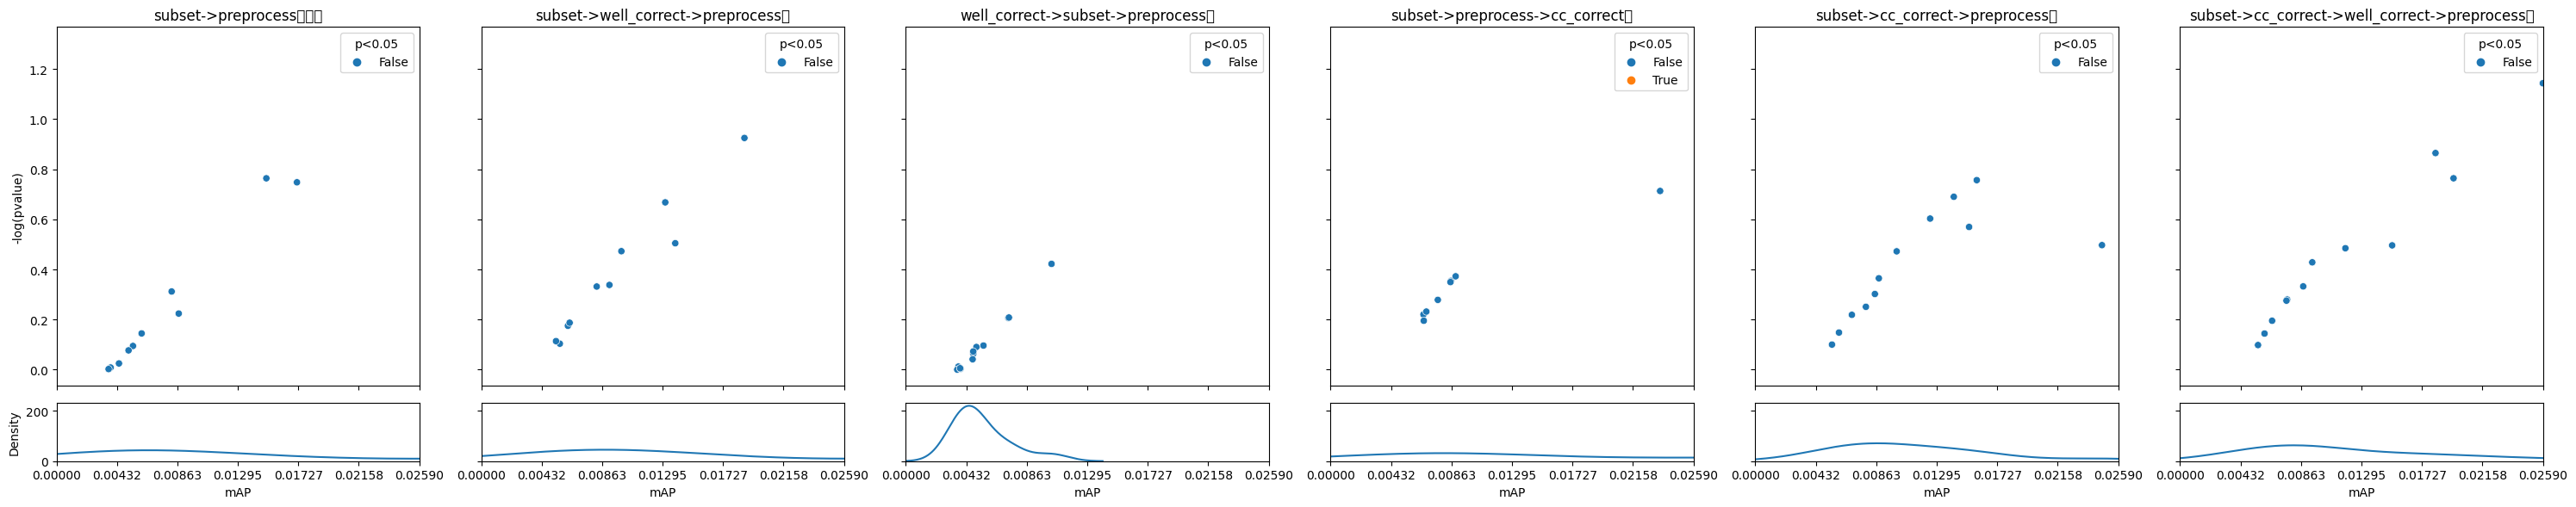

same_well_same_pert subset->preprocess			 mmAP: 0.231 p<0.05: 0.969 (2519/2600)
same_well_same_pert subset->well_correct->preprocess	 mmAP: 0.177 p<0.05: 0.816 (2121/2600)
same_well_same_pert well_correct->subset->preprocess	 mmAP: 0.242 p<0.05: 0.7 (1821/2600)
same_well_same_pert subset->preprocess->cc_correct	 mmAP: 0.101 p<0.05: 0.585 (1521/2600)
same_well_same_pert subset->cc_correct->preprocess	 mmAP: 0.0326 p<0.05: 0.14 (363/2600)
same_well_same_pert subset->cc_correct->well_correct->preprocess	 mmAP: 0.526 p<0.05: 0.969 (2520/2600)


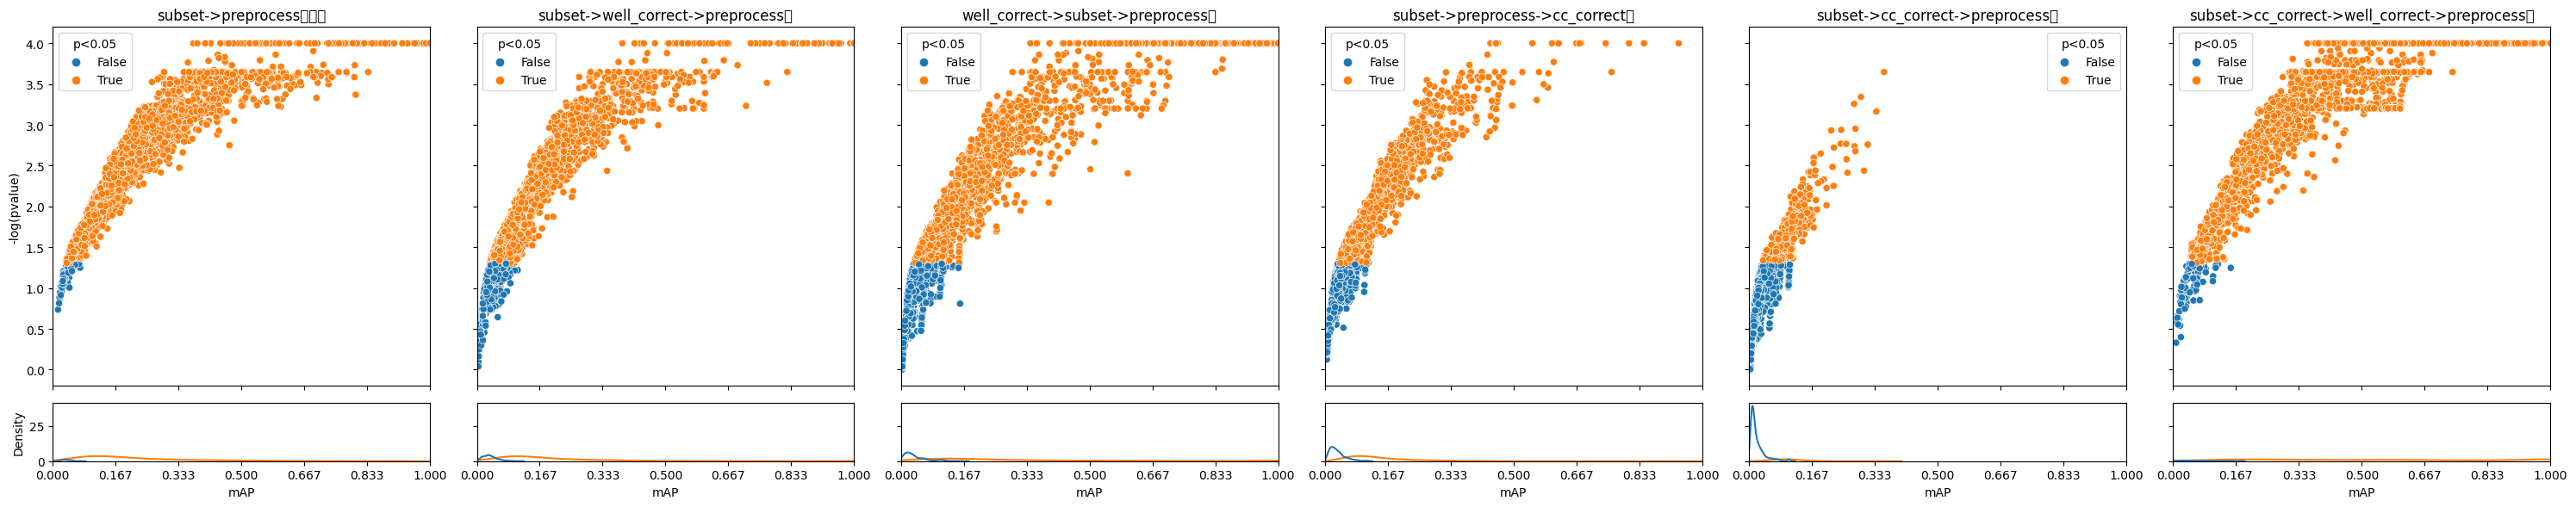

In [11]:
for config in metrics_low_ccv_df.config.unique():
    config_df = metrics_low_ccv_df[metrics_low_ccv_df.config==config]
    plot_map_per_config(config_df, config, figsave_path=FIGSAVE_PATH / "low_ccv")

#### High CCV

same_well_diff_pert subset->preprocess			 mmAP: 0.0634 p<0.05: 0.139 (51/368)
same_well_diff_pert subset->well_correct->preprocess	 mmAP: 0.0594 p<0.05: 0.0353 (13/368)
same_well_diff_pert well_correct->subset->preprocess	 mmAP: 0.0978 p<0.05: 0.166 (61/368)
same_well_diff_pert subset->preprocess->cc_correct	 mmAP: 0.0564 p<0.05: 0.0489 (18/368)
same_well_diff_pert subset->cc_correct->preprocess	 mmAP: 0.053 p<0.05: 0.0 (0/368)
same_well_diff_pert subset->cc_correct->well_correct->preprocess	 mmAP: 0.248 p<0.05: 0.905 (333/368)


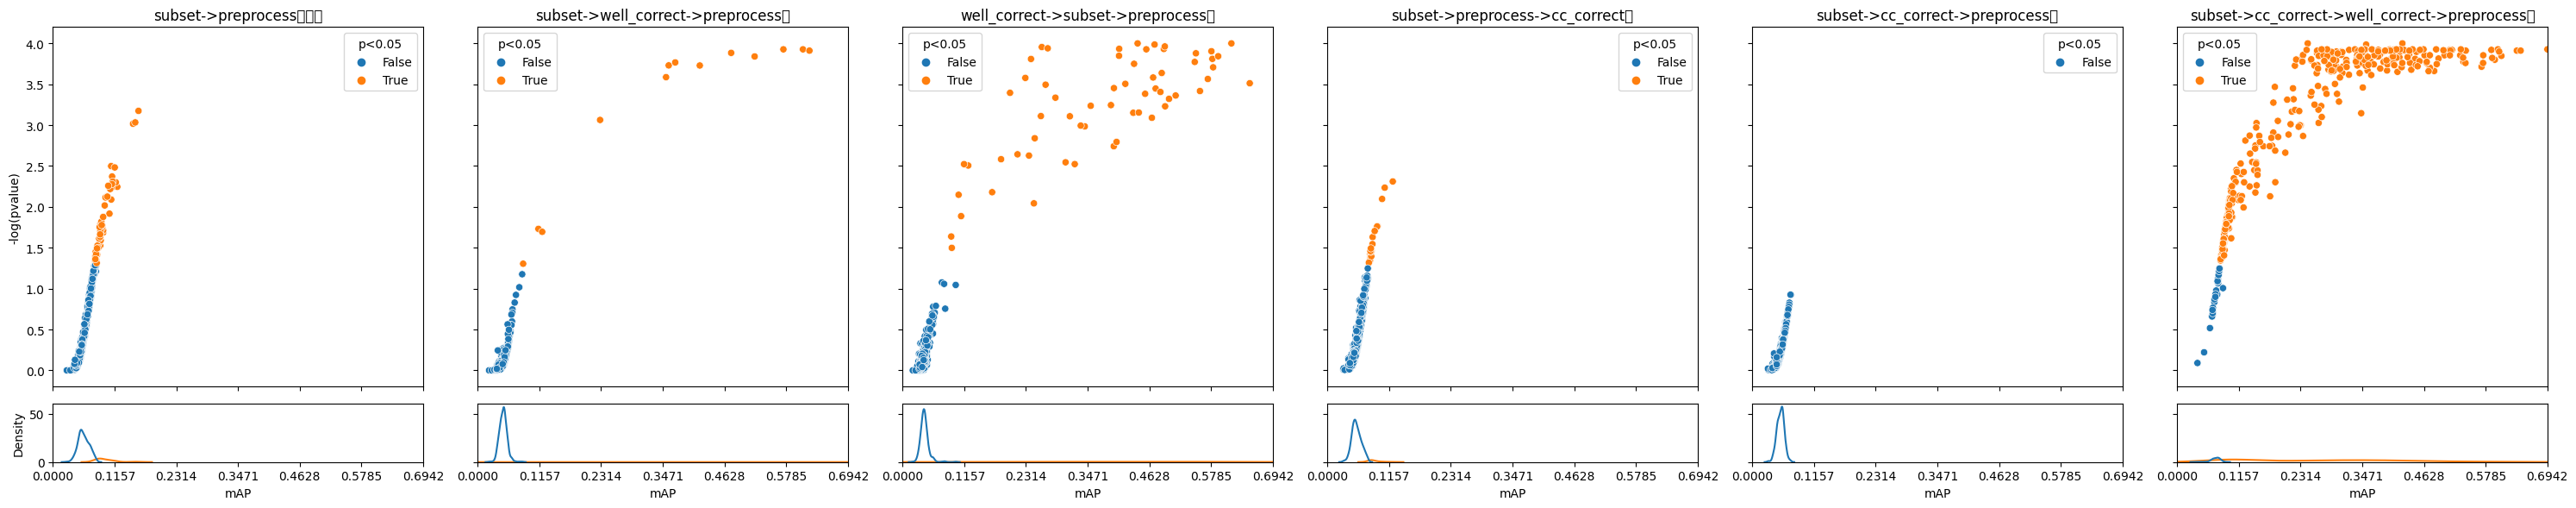

same_pert_diff_well subset->preprocess			 mmAP: 0.0085 p<0.05: 0.0 (0/25)
same_pert_diff_well subset->well_correct->preprocess	 mmAP: 0.0135 p<0.05: 0.0 (0/25)
same_pert_diff_well well_correct->subset->preprocess	 mmAP: 0.0126 p<0.05: 0.04 (1/25)
same_pert_diff_well subset->preprocess->cc_correct	 mmAP: 0.0099 p<0.05: 0.0 (0/25)
same_pert_diff_well subset->cc_correct->preprocess	 mmAP: 0.0136 p<0.05: 0.0 (0/25)
same_pert_diff_well subset->cc_correct->well_correct->preprocess	 mmAP: 0.0102 p<0.05: 0.0 (0/25)


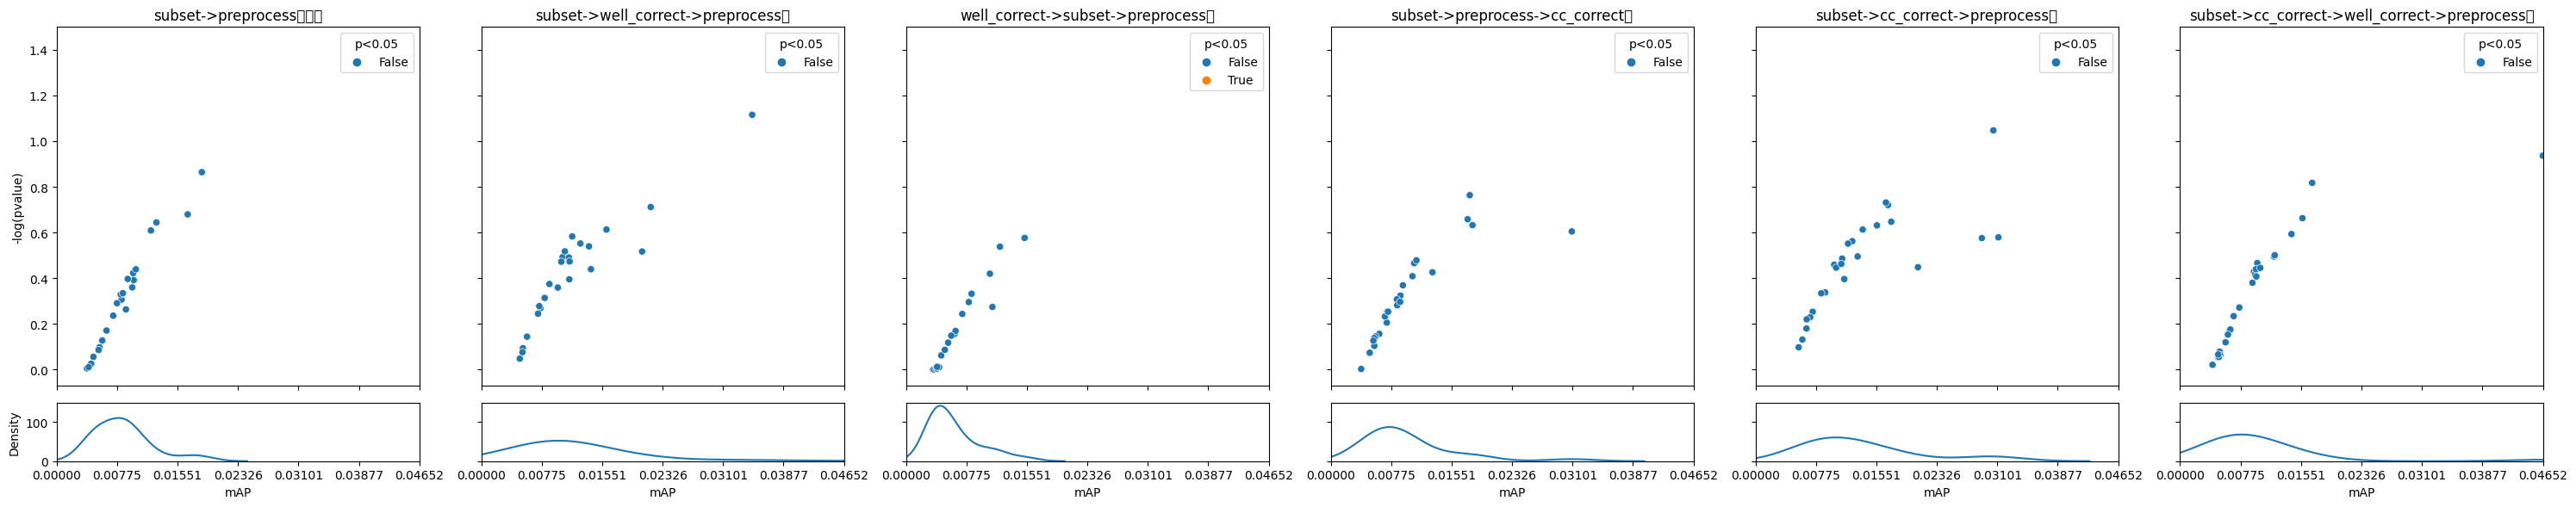

same_well_same_pert subset->preprocess			 mmAP: 0.113 p<0.05: 0.737 (776/1053)
same_well_same_pert subset->well_correct->preprocess	 mmAP: 0.134 p<0.05: 0.674 (710/1053)
same_well_same_pert well_correct->subset->preprocess	 mmAP: 0.245 p<0.05: 0.644 (678/1053)
same_well_same_pert subset->preprocess->cc_correct	 mmAP: 0.0589 p<0.05: 0.286 (301/1053)
same_well_same_pert subset->cc_correct->preprocess	 mmAP: 0.0322 p<0.05: 0.132 (139/1053)
same_well_same_pert subset->cc_correct->well_correct->preprocess	 mmAP: 0.487 p<0.05: 0.934 (983/1053)


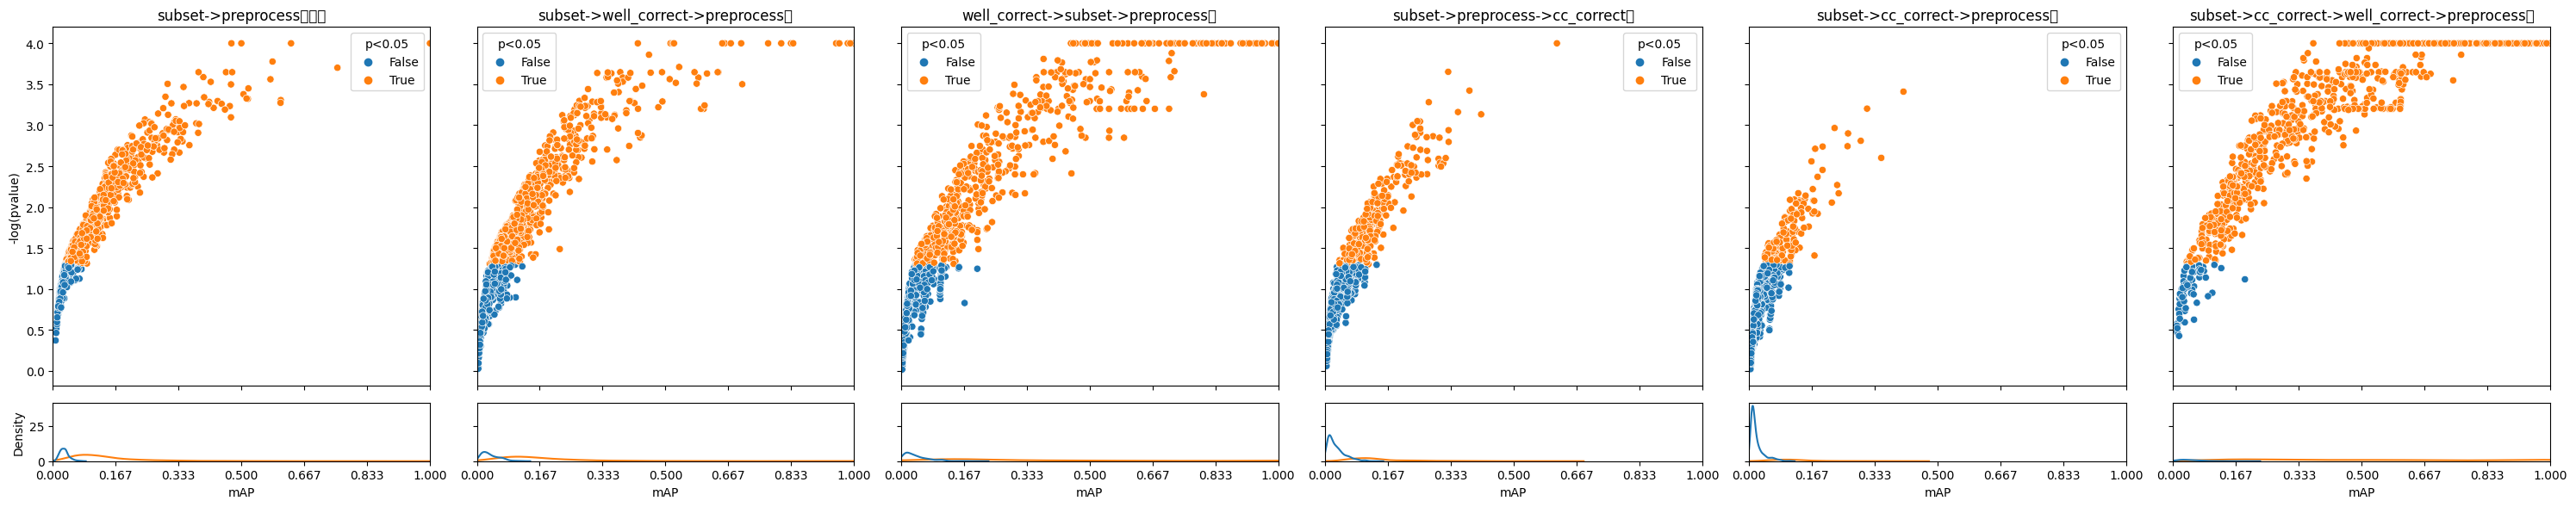

In [12]:
for config in metrics_high_ccv_df.config.unique():
    config_df = metrics_high_ccv_df[metrics_high_ccv_df.config==config]
    plot_map_per_config(config_df, config, figsave_path=FIGSAVE_PATH / "high_ccv")

### Explore relationship between cell count variability and mAP

In [13]:
cell_count_cvar = pd.read_csv("../1.load/output/cell_count_per_orf.csv")
cell_count_cvar

Metadata_JCP2022  Metadata_Cell_Count_CoV
0      JCP2022_900006                 0.052080
1      JCP2022_900008                 0.133191
2      JCP2022_900012                 0.052447
3      JCP2022_900014                 0.084927
4      JCP2022_900015                 0.087774
...               ...                      ...
3611   JCP2022_915120                 0.098188
3612   JCP2022_915123                 0.076138
3613   JCP2022_915125                 0.110349
3614   JCP2022_915126                 0.052932
3615   JCP2022_915127                 0.066824

[3616 rows x 2 columns]

#### Merge metrics and cell count CoV on JCP id

The only difference is metrics have `NaNs` due to `same_well_diff_pert`

In [14]:
print("Diff:", set(metrics_df.Metadata_JCP2022.unique()).symmetric_difference(set(cell_count_cvar.Metadata_JCP2022.unique())))

metrics_df = metrics_df.merge(cell_count_cvar, on="Metadata_JCP2022", how="left")
metrics_df.head(3)

Diff: {nan}


Metadata_Well       mAP  -log(pvalue)  -log(qvalue)               config  \
0           A01  0.120856      2.245085      0.814117  same_well_diff_pert   
1           A02  0.109512      2.089503      0.796366  same_well_diff_pert   
2           A03  0.088952      1.527725      0.566763  same_well_diff_pert   

                     subset  p<0.05 Metadata_JCP2022  Metadata_Cell_Count_CoV  
0  subset->preprocess\t\t\t    True              NaN                      NaN  
1  subset->preprocess\t\t\t    True              NaN                      NaN  
2  subset->preprocess\t\t\t    True              NaN                      NaN

same_well_diff_pert subset->preprocess			 mmAP: 0.0634 p<0.05: 0.139 (51/368)
same_well_diff_pert subset->well_correct->preprocess	 mmAP: 0.0594 p<0.05: 0.0353 (13/368)
same_well_diff_pert well_correct->subset->preprocess	 mmAP: 0.0978 p<0.05: 0.166 (61/368)
same_well_diff_pert subset->preprocess->cc_correct	 mmAP: 0.0564 p<0.05: 0.0489 (18/368)
same_well_diff_pert subset->cc_correct->preprocess	 mmAP: 0.053 p<0.05: 0.0 (0/368)
same_well_diff_pert subset->cc_correct->well_correct->preprocess	 mmAP: 0.248 p<0.05: 0.905 (333/368)


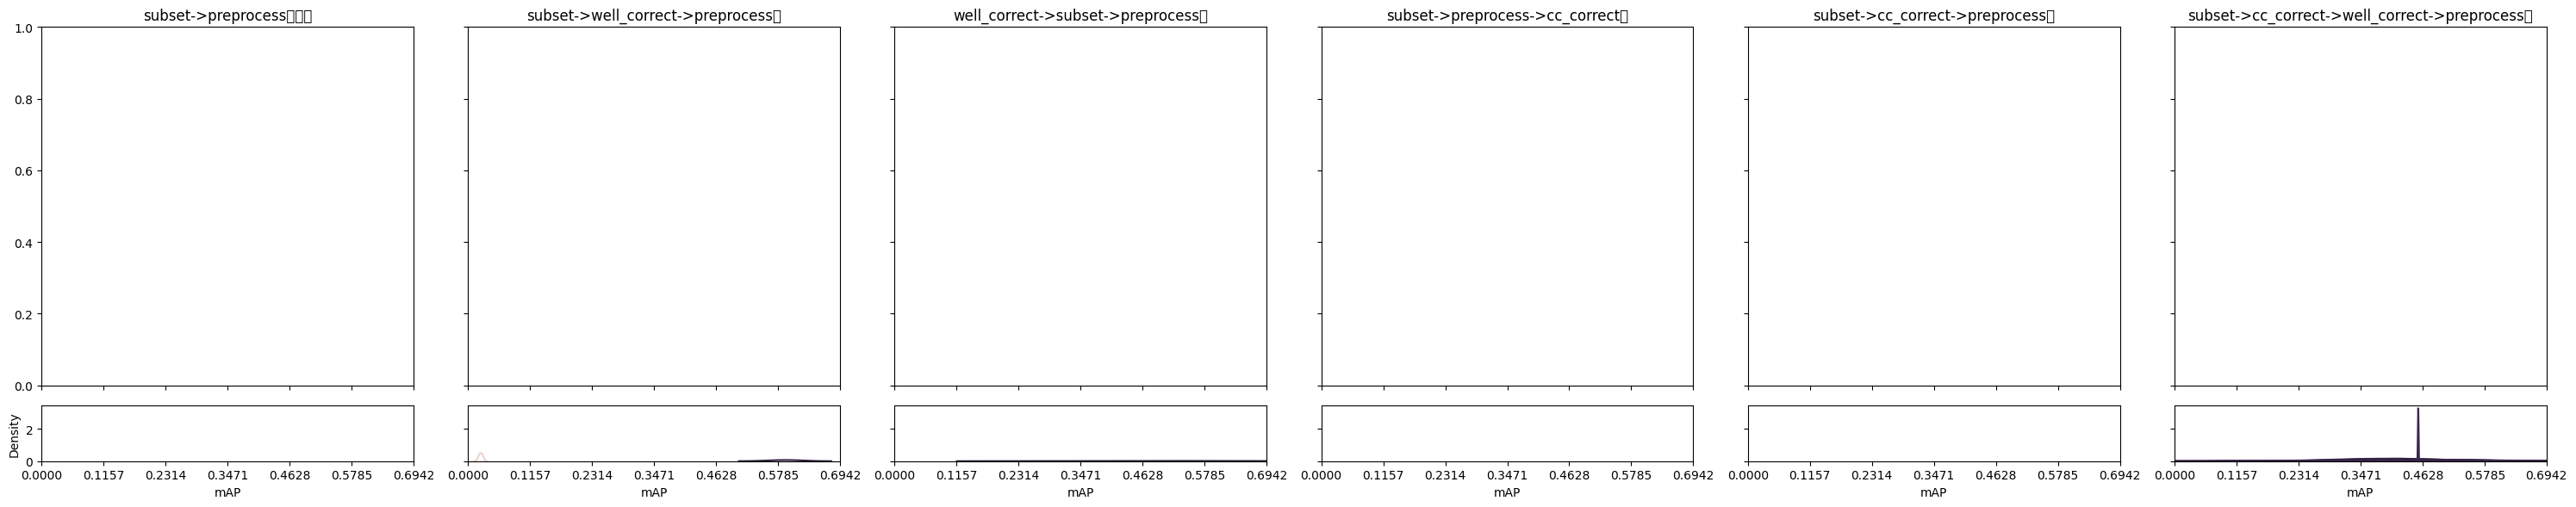

same_pert_diff_well subset->preprocess			 mmAP: 0.00961 p<0.05: 0.0 (0/37)
same_pert_diff_well subset->well_correct->preprocess	 mmAP: 0.0135 p<0.05: 0.0 (0/37)
same_pert_diff_well well_correct->subset->preprocess	 mmAP: 0.0102 p<0.05: 0.027 (1/37)
same_pert_diff_well subset->preprocess->cc_correct	 mmAP: 0.013 p<0.05: 0.027 (1/37)
same_pert_diff_well subset->cc_correct->preprocess	 mmAP: 0.0129 p<0.05: 0.0 (0/37)
same_pert_diff_well subset->cc_correct->well_correct->preprocess	 mmAP: 0.0107 p<0.05: 0.0 (0/37)


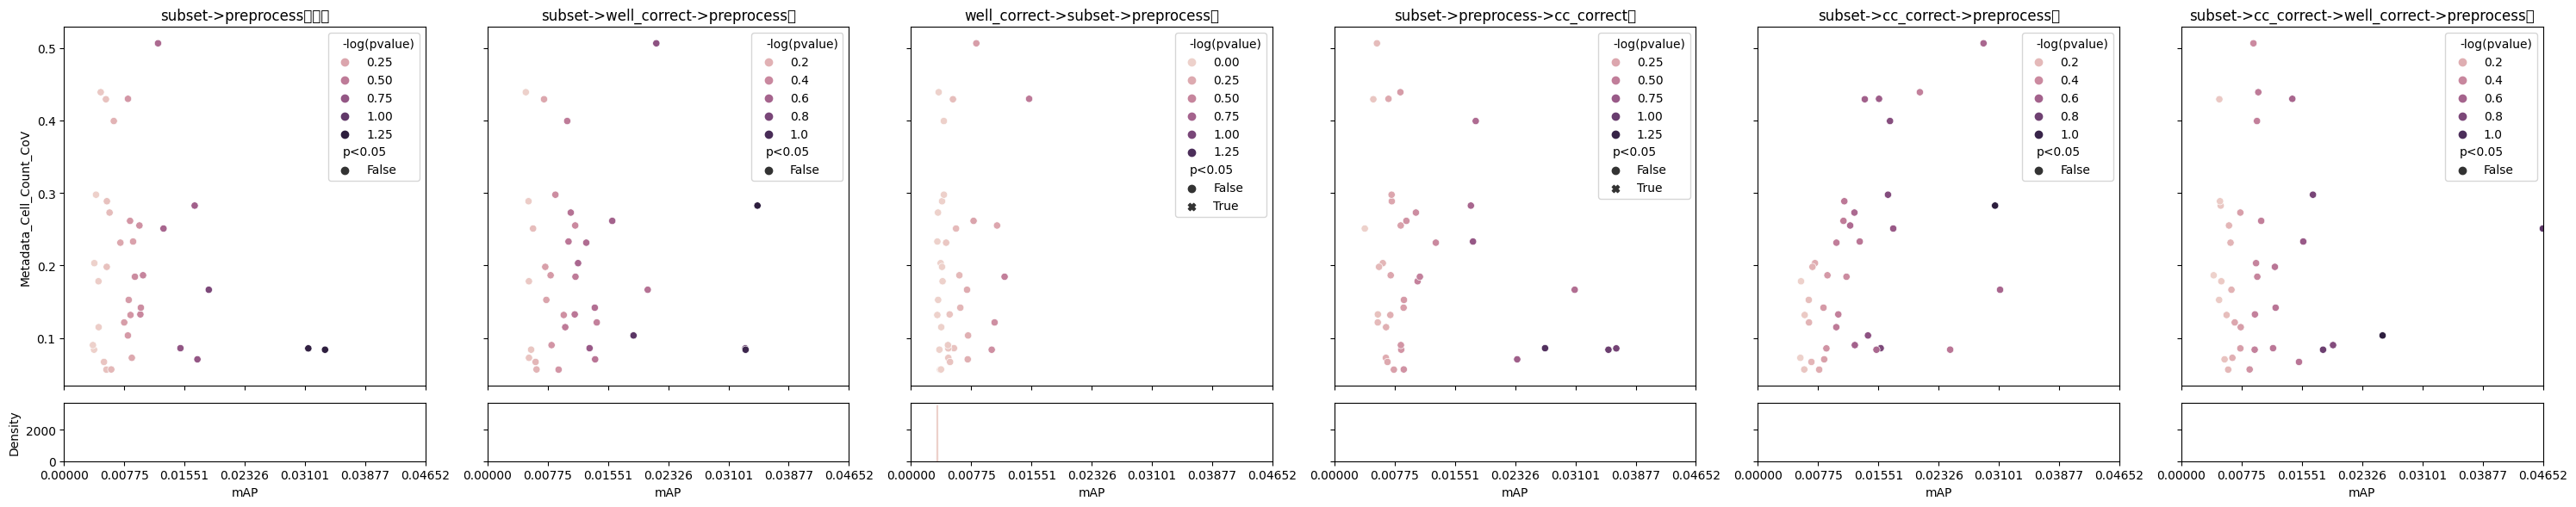

same_well_same_pert subset->preprocess			 mmAP: 0.197 p<0.05: 0.902 (3295/3653)
same_well_same_pert subset->well_correct->preprocess	 mmAP: 0.165 p<0.05: 0.775 (2831/3653)
same_well_same_pert well_correct->subset->preprocess	 mmAP: 0.243 p<0.05: 0.684 (2499/3653)
same_well_same_pert subset->preprocess->cc_correct	 mmAP: 0.0887 p<0.05: 0.499 (1822/3653)
same_well_same_pert subset->cc_correct->preprocess	 mmAP: 0.0325 p<0.05: 0.137 (502/3653)
same_well_same_pert subset->cc_correct->well_correct->preprocess	 mmAP: 0.515 p<0.05: 0.959 (3503/3653)


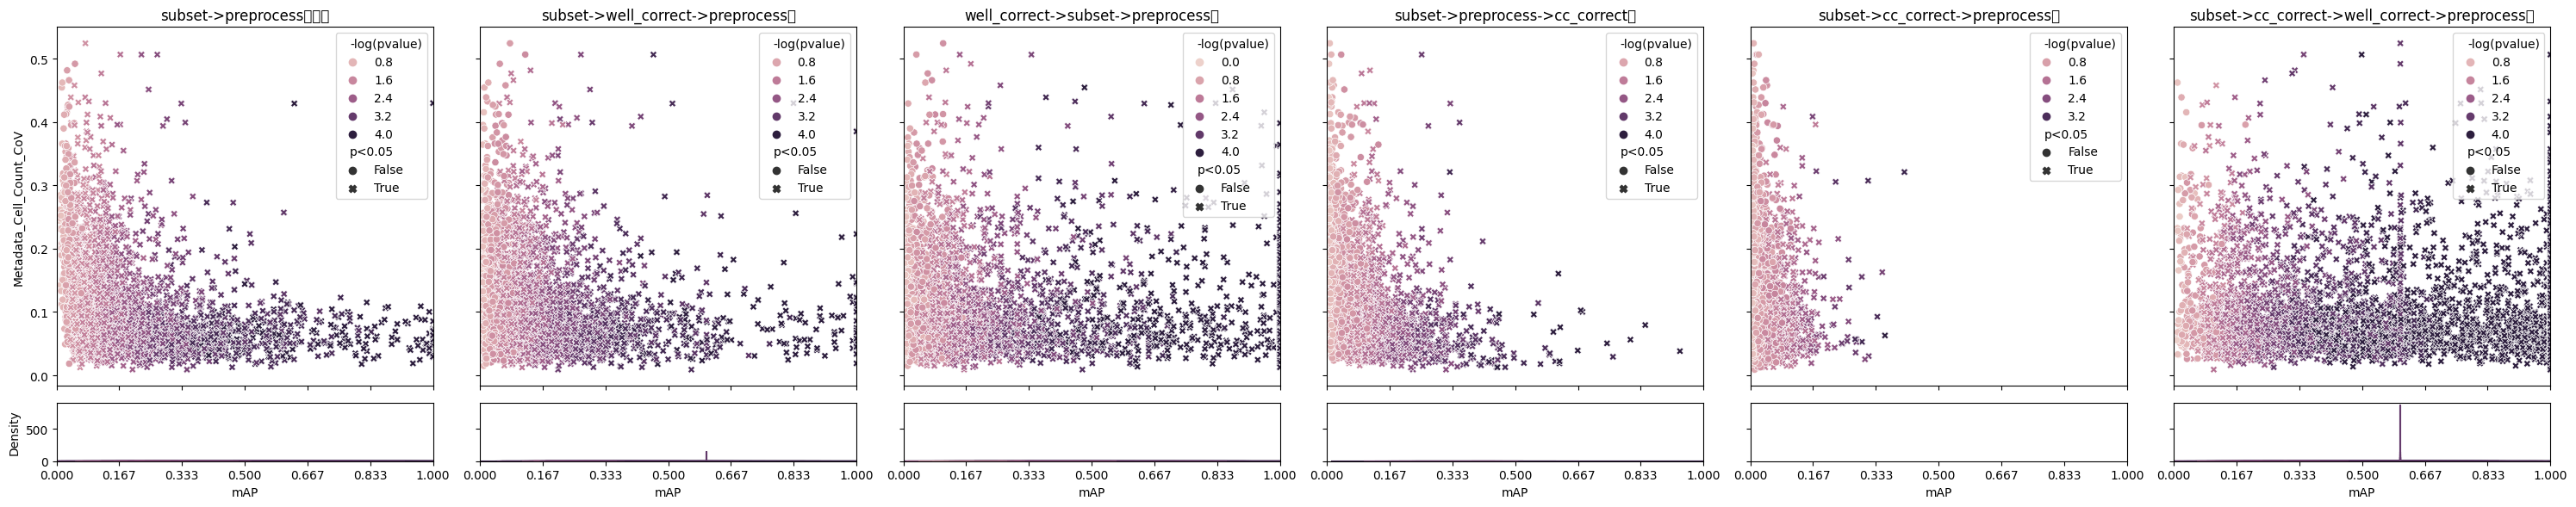

In [15]:
for config in metrics_df.config.unique():
    config_df = metrics_df[metrics_df.config==config]
    plot_map_per_config(config_df, config, y_col="Metadata_Cell_Count_CoV",
                        hue_col="-log(pvalue)", style_col="p<0.05",
                         figsave_path=FIGSAVE_PATH / "map_vs_ccv")

same_well_diff_pert subset->preprocess			 mmAP: 0.0634 p<0.05: 0.139 (51/368)
same_well_diff_pert subset->well_correct->preprocess	 mmAP: 0.0594 p<0.05: 0.0353 (13/368)
same_well_diff_pert well_correct->subset->preprocess	 mmAP: 0.0978 p<0.05: 0.166 (61/368)
same_well_diff_pert subset->preprocess->cc_correct	 mmAP: 0.0564 p<0.05: 0.0489 (18/368)
same_well_diff_pert subset->cc_correct->preprocess	 mmAP: 0.053 p<0.05: 0.0 (0/368)
same_well_diff_pert subset->cc_correct->well_correct->preprocess	 mmAP: 0.248 p<0.05: 0.905 (333/368)


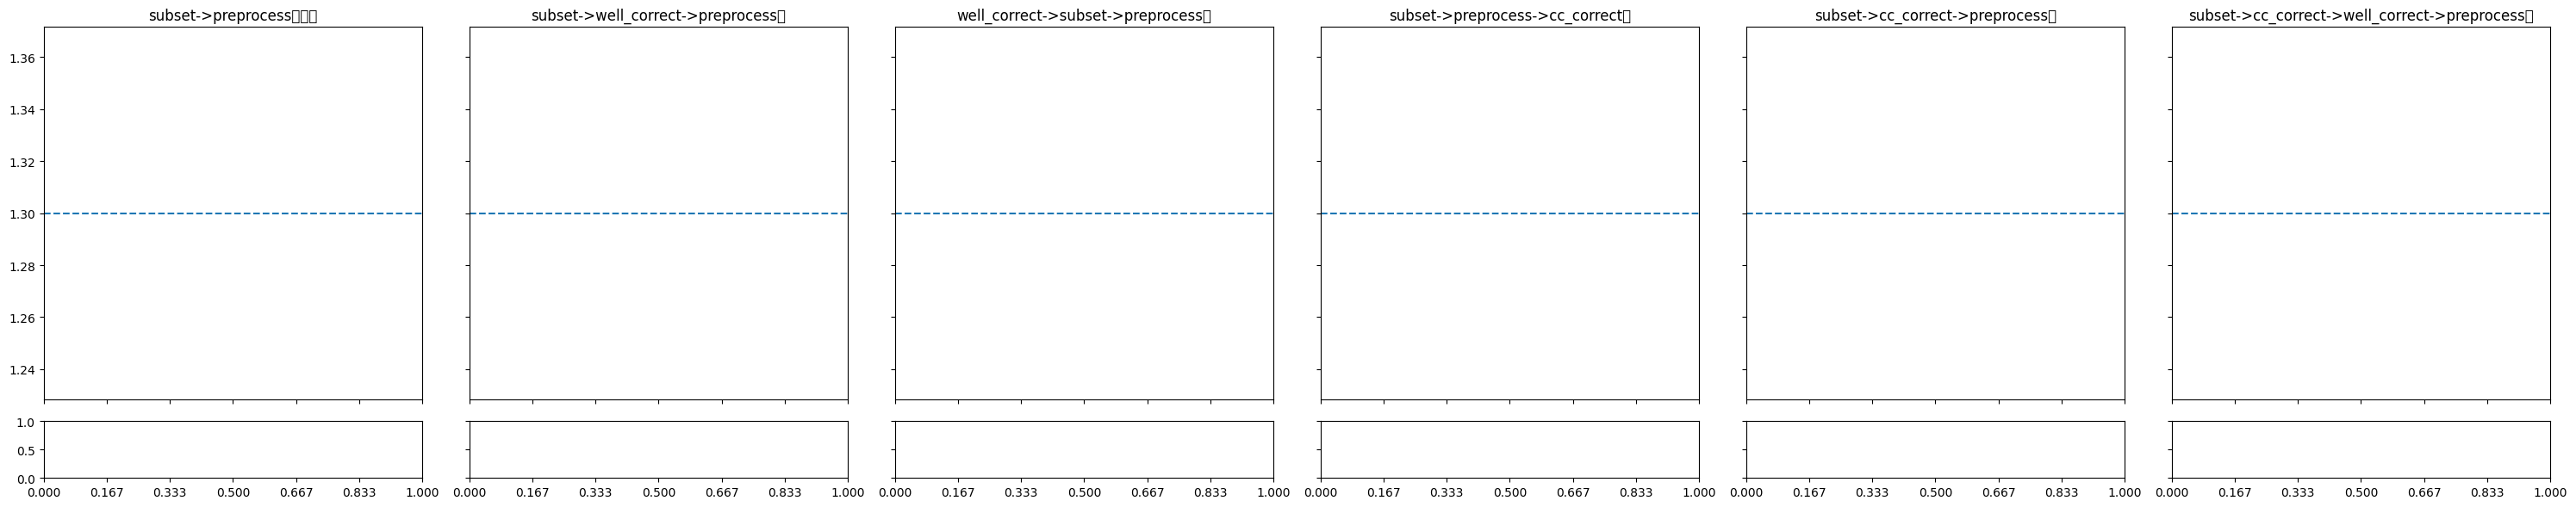

same_pert_diff_well subset->preprocess			 mmAP: 0.00961 p<0.05: 0.0 (0/37)
same_pert_diff_well subset->well_correct->preprocess	 mmAP: 0.0135 p<0.05: 0.0 (0/37)
same_pert_diff_well well_correct->subset->preprocess	 mmAP: 0.0102 p<0.05: 0.027 (1/37)
same_pert_diff_well subset->preprocess->cc_correct	 mmAP: 0.013 p<0.05: 0.027 (1/37)
same_pert_diff_well subset->cc_correct->preprocess	 mmAP: 0.0129 p<0.05: 0.0 (0/37)
same_pert_diff_well subset->cc_correct->well_correct->preprocess	 mmAP: 0.0107 p<0.05: 0.0 (0/37)


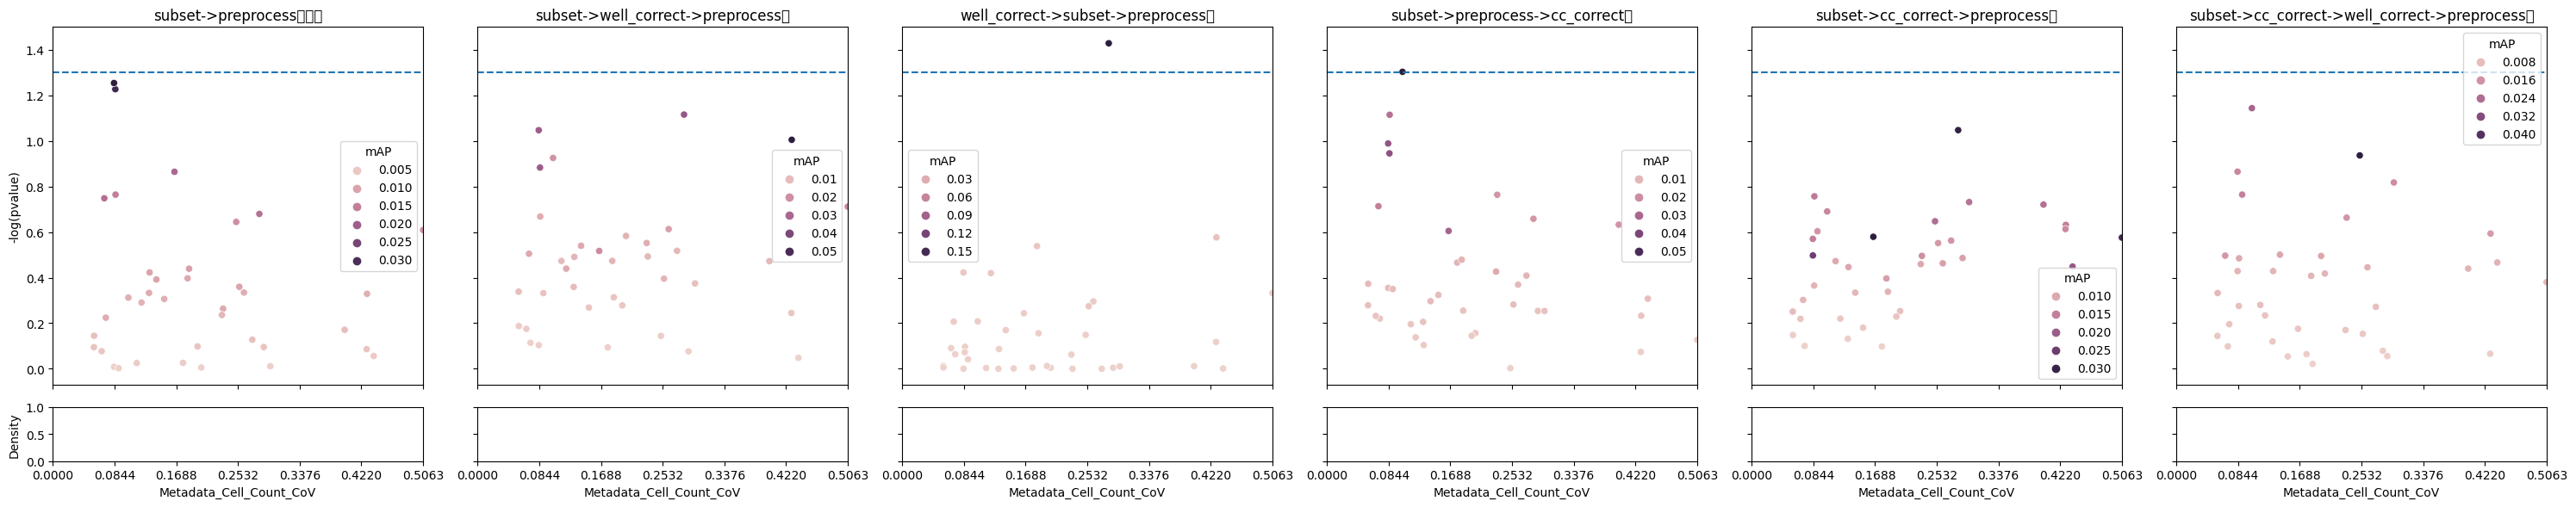

same_well_same_pert subset->preprocess			 mmAP: 0.197 p<0.05: 0.902 (3295/3653)
same_well_same_pert subset->well_correct->preprocess	 mmAP: 0.165 p<0.05: 0.775 (2831/3653)
same_well_same_pert well_correct->subset->preprocess	 mmAP: 0.243 p<0.05: 0.684 (2499/3653)
same_well_same_pert subset->preprocess->cc_correct	 mmAP: 0.0887 p<0.05: 0.499 (1822/3653)
same_well_same_pert subset->cc_correct->preprocess	 mmAP: 0.0325 p<0.05: 0.137 (502/3653)
same_well_same_pert subset->cc_correct->well_correct->preprocess	 mmAP: 0.515 p<0.05: 0.959 (3503/3653)


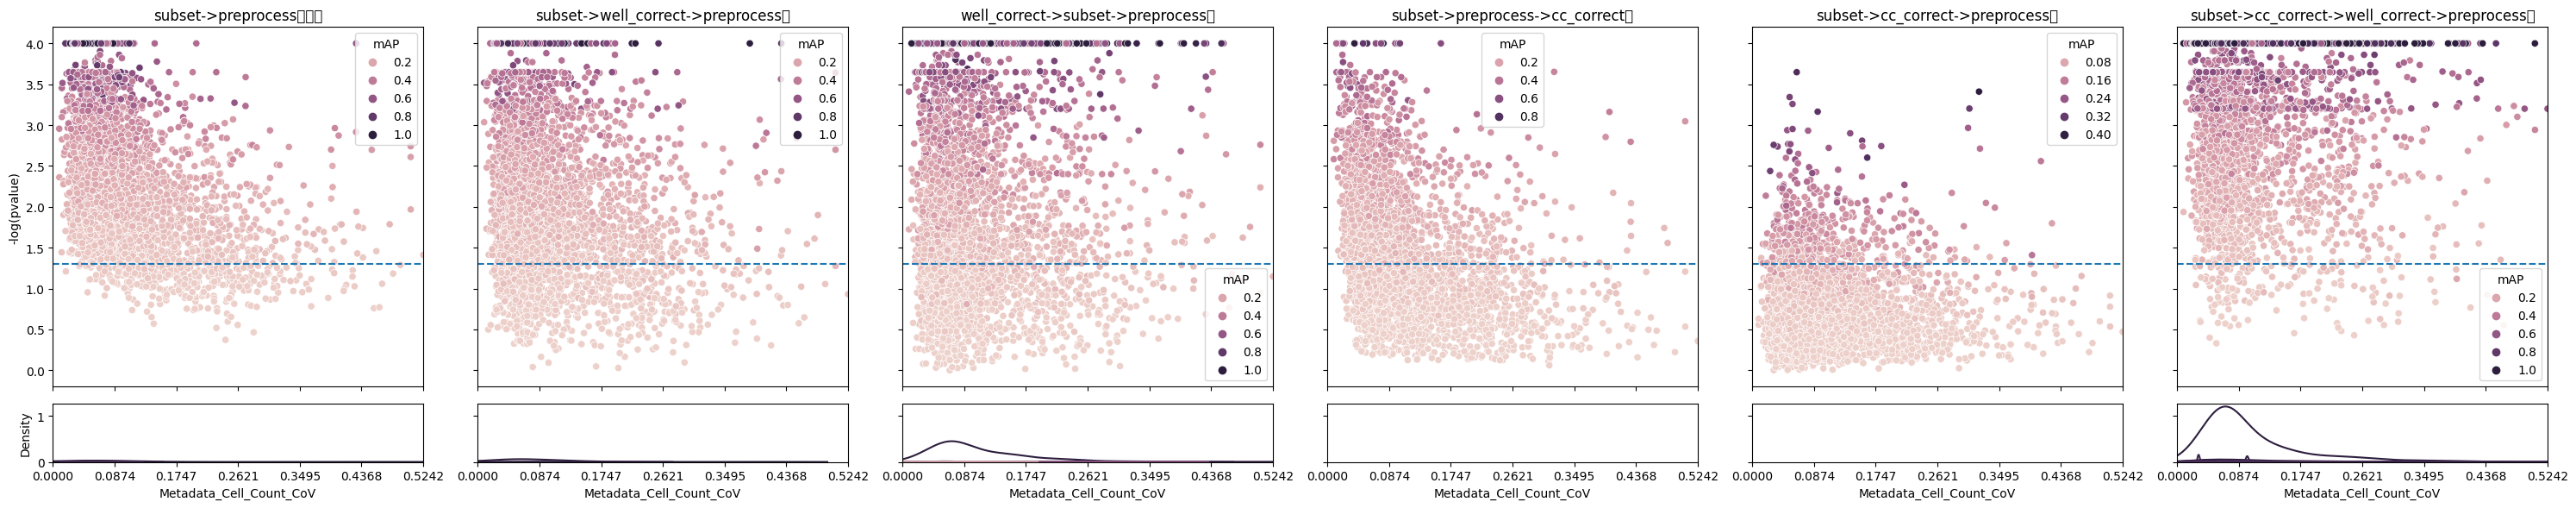

In [16]:
for config in metrics_df.config.unique():
    config_df = metrics_df[metrics_df.config==config]
    plot_map_per_config(config_df, config, x_col="Metadata_Cell_Count_CoV", hue_col="mAP", ax_line=1.3,
                        figsave_path=FIGSAVE_PATH / "pvalue_vs_ccv")